In [2]:
from pathlib import Path

import cv2
import numpy as np
import rawpy
import matplotlib.pyplot as plt
import math

# These modules do exist. Pylint can't find them for some reason.
# pylint: disable=no-name-in-module
from skimage.exposure import adjust_gamma, equalize_adapthist
from skimage.util import img_as_ubyte, img_as_float

In [3]:
# orf = Path("~/data/comp/P8230016.ORF").expanduser()
orf = Path("~/data/comp/P8290119.ORF").expanduser()

orf

PosixPath('/home/chris/data/comp/P8290119.ORF')

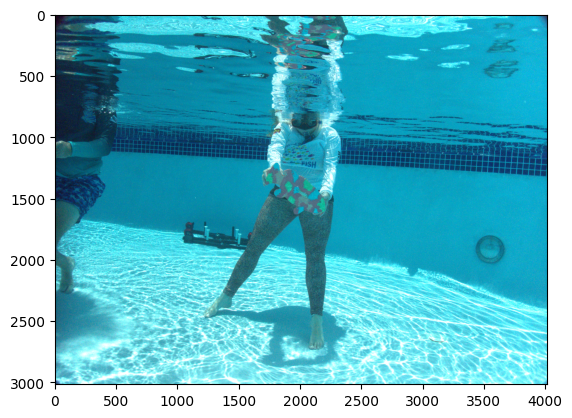

In [4]:
with rawpy.imread(orf.as_posix()) as raw:
    img = raw.postprocess()

    # gamma = np.log(img_as_ubyte(img).mean())/np.log(128)
    # img = adjust_gamma(img, gamma=gamma)

plt.imshow(img)
plt.show()

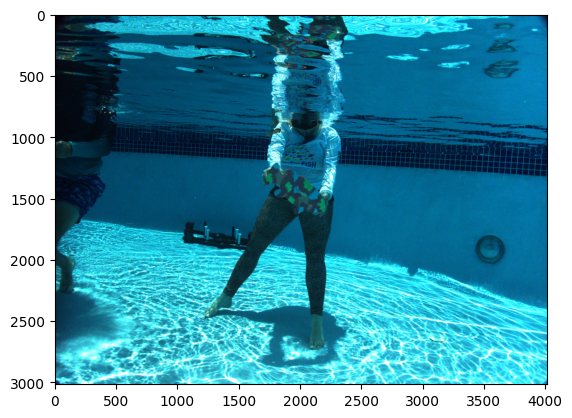

In [5]:
with rawpy.imread(orf.as_posix()) as raw:
    img_raw = img_as_float(raw.postprocess(
        gamma=(1, 1), no_auto_bright=True, use_camera_wb=False, output_bps=16
    ))

plt.imshow(img_raw)
plt.show()

In [6]:
img_raw.max()

np.float64(1.0)

In [9]:
gamma = np.log(img_raw.mean() * 255)/np.log(128)

gamma

np.float64(0.9524367695833789)

In [26]:
hsv = cv2.cvtColor(img_as_ubyte(img_raw), cv2.COLOR_BGR2HSV)
hue, sat, val = cv2.split(hsv)

mid = 20
mean = np.mean(val)
meanLog = math.log(mean)
midLog = math.log(mid*255)
gamma =midLog/meanLog
gamma = 1 / gamma

gamma


0.5896955989637644

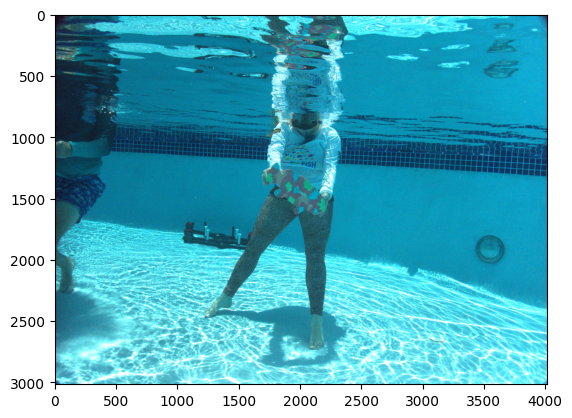

In [27]:
img_gamma = adjust_gamma(img_raw, gamma=gamma)

plt.imshow(img_gamma)
plt.show()

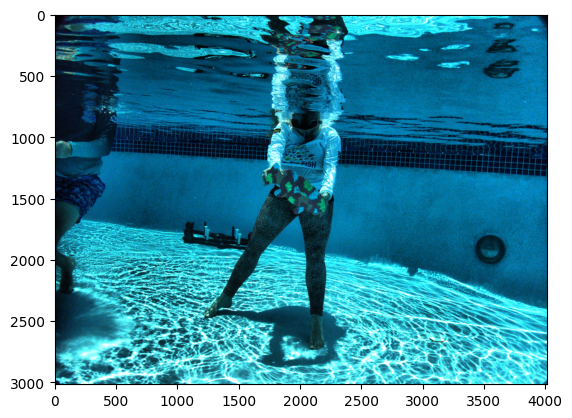

In [ ]:
img_hist = equalize_adapthist(img_gamma)

plt.imshow(img_hist)
plt.show()

In [ ]:
# with rawpy.imread(file.as_posix()) as raw:
#     img = raw.postprocess(
#         gamma=(1, 1), no_auto_bright=True, use_camera_wb=True, output_bps=16
#     )
#     img = adjust_gamma(img, gamma=self.__gamma)
#     img = equalize_adapthist(img)